In [1]:
import random

import matplotlib.pyplot as plt
from task1 import *
from task2 import *
from task3 import *
from task4 import reachability_with_constraints
import cfpq_data
from scipy.sparse import bsr_matrix, coo_matrix, csr_matrix, csc_matrix, dia_matrix, dok_matrix, lil_matrix
import random
import datetime
import platform



import sources directory


### Введение
В этой работе будет проведен анализ алгоритмов достижимости в конечном автомате с регулярными ограничениями. Будут исследованы следующие функции:
1. all_paths - эта функция находит пары вершин графа из заданного множества стартовых и финальных (ноо при этоом она решает задачу достижимости между всеми парамами вершин графа) таких, что слово, образованное путем из данной стартовой вершины в данную финальную вершину, принадлежит языку, заданному регулярным выражением. Она это делает при помощи пересечения конечных автоматов, представляющих граф и регулярное выржение.
2. reachability_with_constraints - эта функция решает задачу достижимости между заданными множествами старртовых и финальных вершин

### Графы
Будем использовать следующие графы:
+ wc
+ pr
+ wine 
+ core
+ pathway

Характеристики графов перечислены ниже

---

### Запросы
Выберем следующие графы и запросы:
1. Для графов ls, gzip:
    (a | d)* a
    (a | d)+ d*
    a d a (a|d)*
    (a | d)
2. Для графов wine, core, pathway выберем запросы из задания:
    (l1 | l2)* l3
    (l3 | l4)+ l1*
    l1 l2 l3 (l4 | l1)*
    l1 | l2

Где символам l1, l2, l3, l4 соответствуют первые 4 метки из описания соответствующих графов ниже

Набор графов и запросов к ним выбран таким образом, чтобы покрыть графы разных топологий и регулярные выражения разных видов

In [2]:
graphs = {}
graph_names = ["wc", "pr", "wine", "core", "pathways"]

for graph_name in graph_names:
    graph_path = cfpq_data.download(graph_name)
    graph = cfpq_data.graph_from_csv(graph_path)
    nNodes, nEdges, labels = graph_info(graph_name)
    graphs[graph_name] = {}
    graphs[graph_name]["graph"] = graph
    graphs[graph_name]["nNodes"] = nNodes
    graphs[graph_name]["nEdges"] = nEdges
    graphs[graph_name]["labels"] = labels
    print(f"graph {graph_name}\n"
          f"number of nodes: {nNodes}\n"
          f"number of edges: {nEdges}\n"
          f"labels: {labels}")
    
graph_queries = {}
graph_queries["wc"] = ["(a | d)* a", "(a | d)+ d*", "a d a (a|d)*", "(a | d)"]
graph_queries["pr"] = ["(a | d)* a", "(a | d)+ d*", "a d a (a|d)*", "(a | d)"]
graph_queries["wine"] = ["(first | onProperty)* priorVersion", "(priorVersion | adjacentRegion)+ first*", "first onProperty priorVersion (adjacentRegion|first)*", "(first | onProperty)"]
graph_queries["core"] = ["(first | onProperty)* seeAlso", "(seeAlso | versionInfo)+ first*", "first onProperty seeAlso (versionInfo|first)*", "(first | onProperty)"]
graph_queries["pathways"] = ["(label | type)* subClassOf", "(subClassOf | narrower)+ label*", "first type subClassOf (narrower|label)*", "(first | type)"]


[2024-05-24 01:54:51]>INFO>Found graph with name='wc'
[2024-05-24 01:54:51]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wc.tar.gz')
[2024-05-24 01:54:51]>INFO>Unzip graph name='wc' to file graph=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wc/wc.csv')
[2024-05-24 01:54:51]>INFO>Remove archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wc.tar.gz')
[2024-05-24 01:54:51]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> from path=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wc/wc.csv')
[2024-05-24 01:54:51]>INFO>Found graph with name='wc'
[2024-05-24 01:54:51]>INFO>Load archive graph_archive=PosixPath(

graph wc
number of nodes: 332
number of edges: 269
labels: {'a', 'd'}


[2024-05-24 01:54:52]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pr.tar.gz')
[2024-05-24 01:54:52]>INFO>Unzip graph name='pr' to file graph=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pr/pr.csv')
[2024-05-24 01:54:52]>INFO>Remove archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pr.tar.gz')
[2024-05-24 01:54:52]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x121b3f530> from path=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pr/pr.csv')
[2024-05-24 01:54:52]>INFO>Found graph with name='wine'
[2024-05-24 01:54:52]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-cou

graph pr
number of nodes: 815
number of edges: 692
labels: {'a', 'd'}


[2024-05-24 01:54:52]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wine.tar.gz')
[2024-05-24 01:54:52]>INFO>Unzip graph name='wine' to file graph=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wine/wine.csv')
[2024-05-24 01:54:52]>INFO>Remove archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wine.tar.gz')
[2024-05-24 01:54:52]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x10b871160> from path=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/wine/wine.csv')
[2024-05-24 01:54:52]>INFO>Found graph with name='core'
[2024-05-24 01:54:52]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/f

graph wine
number of nodes: 733
number of edges: 1839
labels: {'disjointWith', 'imports', 'hasBody', 'maxCardinality', 'cardinality', 'minCardinality', 'comment', 'someValuesFrom', 'oneOf', 'inverseOf', 'range', 'allValuesFrom', 'hasFlavor', 'hasValue', 'distinctMembers', 'hasMaker', 'subClassOf', 'locatedIn', 'madeFromGrape', 'hasVintageYear', 'type', 'label', 'onProperty', 'subPropertyOf', 'differentFrom', 'yearValue', 'priorVersion', 'adjacentRegion', 'intersectionOf', 'hasSugar', 'unionOf', 'hasColor', 'first', 'domain', 'rest'}


[2024-05-24 01:54:52]>INFO>Found graph with name='core'
[2024-05-24 01:54:52]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/core.tar.gz')
[2024-05-24 01:54:52]>INFO>Unzip graph name='core' to file graph=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/core/core.csv')
[2024-05-24 01:54:52]>INFO>Remove archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/core.tar.gz')
[2024-05-24 01:54:52]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x11ed46f90> from path=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/core/core.csv')
[2024-05-24 01:54:52]>INFO>Found graph with name='pathways'


graph core
number of nodes: 1323
number of edges: 2752
labels: {'disjointWith', 'equivalentClass', 'isDefinedBy', 'domain', 'maxQualifiedCardinality', 'maxCardinality', 'cardinality', 'minCardinality', 'comment', 'someValuesFrom', 'oneOf', 'inverseOf', 'seeAlso', 'versionInfo', 'range', 'allValuesFrom', 'distinctMembers', 'hasValue', 'subClassOf', 'type', 'label', 'onClass', 'onDataRange', 'onProperty', 'subPropertyOf', 'intersectionOf', 'deprecated', 'unionOf', 'first', 'qualifiedCardinality', 'rest'}


[2024-05-24 01:54:53]>INFO>Load archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pathways.tar.gz')
[2024-05-24 01:54:53]>INFO>Unzip graph name='pathways' to file graph=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pathways/pathways.csv')
[2024-05-24 01:54:53]>INFO>Remove archive graph_archive=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pathways.tar.gz')
[2024-05-24 01:54:53]>INFO>Load graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120b3fb30> from path=PosixPath('/Users/maximvasilev/PycharmProjects/formal-lang-course/.venv/lib/python3.12/site-packages/cfpq_data/data/graphs/pathways/pathways.csv')
[2024-05-24 01:54:53]>INFO>Found graph with name='pathways'
[2024-05-24 01:54:53]>INFO>Load archive graph_archive=PosixPath('/User

graph pathways
number of nodes: 6238
number of edges: 12363
labels: {'imports', 'narrower', 'subClassOf', 'type', 'label'}


### Оборудование
При проведении эксперимента использовалось следующее оборудование:

In [3]:
print(platform.machine())
print(platform.version())
print(platform.platform())
print(platform.uname())
print(platform.system())
print(platform.processor())

x86_64
Darwin Kernel Version 23.0.0: Fri Sep 15 14:42:42 PDT 2023; root:xnu-10002.1.13~1/RELEASE_X86_64
macOS-14.0-x86_64-i386-64bit
uname_result(system='Darwin', node='MacBook-Pro-Maksim-1416.local', release='23.0.0', version='Darwin Kernel Version 23.0.0: Fri Sep 15 14:42:42 PDT 2023; root:xnu-10002.1.13~1/RELEASE_X86_64', machine='x86_64')
Darwin
i386


Исследуем зависимость времени работы указанных выше алгоритмов от тиипа матрицы. Для алгорритма path_ends стартовые и финальные вершины будем назначать случайно в количестве половины от общего числа вершин в этих графах.

In [6]:
def run(algorithm, graph_name, matrix_class, partOfStartNodes=0.5, partOfFinalNodes=0.5):
    now1 = datetime.timedelta(0)
    now2 = datetime.timedelta(0)
    
    number_of_start_nodes = round(graphs[graph_name]["nNodes"] * partOfStartNodes)
    number_of_final_nodes = round(graphs[graph_name]["nNodes"] * partOfFinalNodes)
    start_states = cfpq_data.generate_multiple_source(graphs[graph_name]["graph"], number_of_start_nodes, seed = 41)
    final_states = cfpq_data.generate_multiple_source(graphs[graph_name]["graph"], number_of_final_nodes, seed = 42)
    g = graphs[graph_name]["graph"]

    for cregex in graph_queries[graph_name]:
        if algorithm == reachability_with_constraints:
            g = FiniteAutomaton(graph_to_nfa(graph), matrix_class=matrix_class)
            cregex = FiniteAutomaton(regex_to_dfa(cregex), matrix_class=matrix_class)
            now1 = datetime.datetime.now()
            algorithm(g, cregex, matrix_class)
            now2 = datetime.datetime.now()
        else:
            now1 = datetime.datetime.now()
            algorithm(g, start_states, final_states, cregex, matrix_class)
            now2 = datetime.datetime.now()
    
    return now2 - now1

In [ ]:
matix_classes = [lil_matrix, dok_matrix, csc_matrix, csr_matrix]
algorithms = [paths_ends]
num_cases = 10
times = {}

for i in range(num_cases):
    for matrix_class in matix_classes:
        times[matrix_class_mapper(matrix_class)] = 0
        for algoritm in algorithms:
            for graph_name in graph_names:
                time = run(algoritm, graph_name, matrix_class)
                times[matrix_class_mapper(matrix_class)] += time.microseconds
            

for matrix_class in matix_classes:
        print(f"{matrix_class_mapper(matrix_class)} time: {times[matrix_class_mapper(matrix_class)]/num_cases}")

            

[2024-05-24 02:15:41]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:15:41]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:15:41]>INFO>Generate set of source vertices of 408 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x11fe64e00> for multiple-source evaluation
[2024-05-24 02:15:41]>INFO>Generate set of source vertices of 408 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x11fe64e00> for multiple-source evaluation
[2024-05-24 02:15:42]>INFO>Generate set of source vertices of 366 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x121b15430> for multiple-source evaluation
[2024-05-24 02:15:42]>INFO>Generate set of source vertices of 366 nodes for graph=<networkx.classes.

***Вывод:*** лучшее время работы показали алгоритмы, которые использовали формат lil разряженной матрицы.

### Когда целесообразно использовать каждый из алгоритмов?

Для ответа на этот вопрос поступим следующим образом: сравним время работы алгоритмов path_ends (который по факту решает задачу достижимости между всеми парами вершин) и reachability_with_constraints (ккоторый вешает закдачу дстижимости для заданных сстартовых вершин) на графах wc и wine, выбирая начальные врещины в кколичстве [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] от всех вершин графа



[2024-05-24 02:11:32]>INFO>Generate set of source vertices of 332 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:32]>INFO>Generate set of source vertices of 33 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:32]>INFO>Generate set of source vertices of 66 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:32]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:33]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:33]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.mu

wc
wine


[2024-05-24 02:11:41]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:41]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:42]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:42]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:42]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:42]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:11:52]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:52]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:53]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:53]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:53]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:11:54]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:12:04]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:04]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:05]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:05]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:05]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:05]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:12:14]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:14]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:15]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:15]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:15]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:16]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:12:25]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:25]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:26]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:26]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:26]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:27]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:12:35]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:36]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:36]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:36]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:37]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:37]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:12:45]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:45]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:45]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:46]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:46]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:46]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:12:55]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:55]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:55]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:56]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:56]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:12:56]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


[2024-05-24 02:13:04]>INFO>Generate set of source vertices of 100 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:13:05]>INFO>Generate set of source vertices of 133 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:13:05]>INFO>Generate set of source vertices of 166 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:13:05]>INFO>Generate set of source vertices of 199 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:13:05]>INFO>Generate set of source vertices of 232 nodes for graph=<networkx.classes.multidigraph.MultiDiGraph object at 0x120c60560> for multiple-source evaluation
[2024-05-24 02:13:06]>INFO>Generate set of source vertices of 266 nodes for graph=<networkx.classes.

wc
wine


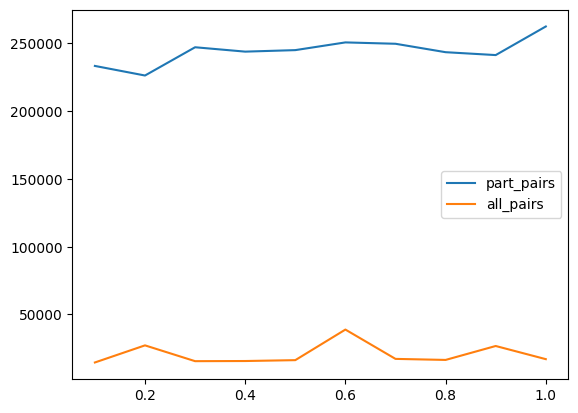

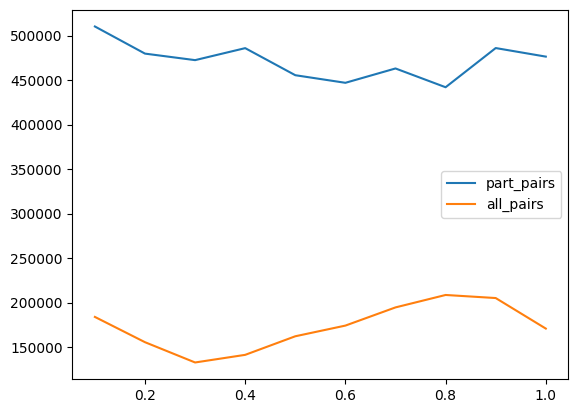

In [11]:
parts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
graphs_names_to = ["wc", "wine"]
num_cases = 10

parts_times = {}
all_pair_times = {}

parts_times["wc"] = [0] * 10
all_pair_times["wc"] = [0] * 10
parts_times["wine"] = [0] * 10
all_pair_times["wine"] = [0] * 10

for i in range(num_cases):
    for graph_name in graphs_names_to:
        for regex in [graph_queries[graph_name][0]]:
            regex_fa = FiniteAutomaton(regex_to_dfa(regex))
            number_of_final_nodes = graphs[graph_name]["nNodes"]
            final_states = cfpq_data.generate_multiple_source(graphs[graph_name]["graph"], number_of_final_nodes, seed = 42)
            
            part_num = 0
            for part in parts:
                number_of_start_nodes = round(graphs[graph_name]["nNodes"] * part)
                start_states = cfpq_data.generate_multiple_source(graphs[graph_name]["graph"], number_of_start_nodes, seed = 42)
                graph_fa = FiniteAutomaton(graph_to_nfa(graphs[graph_name]["graph"]), start_states=start_states, final_states=final_states)
                
                
                p1 = datetime.datetime.now()
                paths_ends(graphs[graph_name]["graph"], start_states, final_states, regex, matrix_class=lil_matrix)
                p2 = datetime.datetime.now()
                all_pair_time = (p2 - p1).microseconds
                all_pair_times[graph_name][part_num] += all_pair_time
                
                n1 = datetime.datetime.now()
                reachability_with_constraints(graph_fa, regex_fa, matrix_class=lil_matrix)
                n2 = datetime.datetime.now()
                parts_time = (n2 - n1).microseconds
                parts_times[graph_name][part_num] += parts_time
                
                part_num += 1
            
    for i in parts_times:
        print(i)
        
for name in graphs_names_to:
    plt.plot(parts, [i/num_cases for i in parts_times[name]], label = "part_pairs")
    plt.plot(parts, [i/num_cases for i in all_pair_times[name]], label = "all_pairs")
    plt.title = name
    plt.xlabel = "parts"
    plt.ylabel = "times, microseconds"
    plt.legend()
    plt.show()
                    

Из полученнны зависимостей видно, что нам всегда целесобразнее использовать алгоритм, реализованный в функции path_ends (то есть тот, который решает задачу удостижимости между всеми парами вершин) - так как он работает в нескоолько раз быстрее алгоритма, решающую задачу по очереди для каждой стартовой вершины